# Air Quality Index Prediction

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

## Reading The Dataset

In [4]:
df = pd.read_csv('Data/Data.csv')

df.sample(5)

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
687,32.4,36.4,27.5,1007.8,65.0,3.1,3.5,11.1,29.000000
322,30.1,35.7,24.0,1008.1,57.0,2.4,5.7,16.5,52.250000
447,31.6,39.9,22.2,1003.4,46.0,1.9,8.5,20.6,20.750000
1002,35.5,39.9,31.2,999.7,60.0,2.4,9.8,18.3,40.375000
965,31.6,38.0,23.2,1002.6,30.0,3.1,18.7,35.2,46.916667


In [6]:
print("df.shape : ", df.shape)

df.shape :  (1093, 9)


<mark>**1093 enteries with 8 features, 1 target value (PM2.5)**</mark>

In [7]:
print(df.columns)

Index(['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM', 'PM 2.5'], dtype='object')


- **T**  	  Average Temperature (°C)            
- **TM**	  Maximum temperature (°C)             
- **Tm**	  Minimum temperature (°C)                 
- **SLP**	  Atmospheric pressure at sea level (hPa)          
- **H**	  Average relative humidity (%)           
- **PP**	  Total rainfall and / or snowmelt (mm)          
- **VV**    Average visibility (Km)           
- **V**	  Average wind speed (Km/h)               
- **VM**    Maximum sustained wind speed (Km/h)            

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1093 entries, 0 to 1092
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T       1093 non-null   float64
 1   TM      1093 non-null   float64
 2   Tm      1093 non-null   float64
 3   SLP     1093 non-null   float64
 4   H       1093 non-null   float64
 5   VV      1093 non-null   float64
 6   V       1093 non-null   float64
 7   VM      1093 non-null   float64
 8   PM 2.5  1092 non-null   float64
dtypes: float64(9)
memory usage: 77.0 KB


<mark>**PM2.5 has only one missing value :**</mark>

In [9]:
df[df['PM 2.5'].isnull()]

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
184,14.3,19.2,10.9,1020.5,91.0,1.6,4.8,11.1,NaN


<mark>**Filling its value using`ffil`**</mark>

In [10]:
df.fillna(method='ffill', inplace = True)

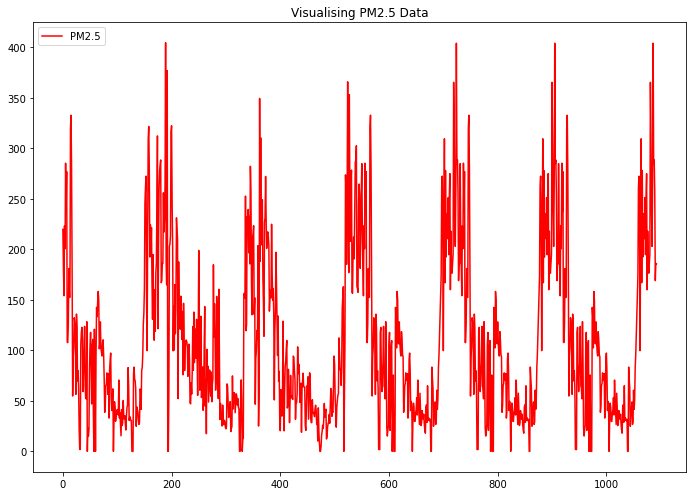

In [11]:
# figure size in inches
rcParams['figure.figsize'] = 11.7,8.27

# Visualising the PM 2.5 Values

sns.lineplot(data = df["PM 2.5"], color="red", label="PM2.5")
plt.title('Visualising PM2.5 Data')
plt.show()

**There seems to be some repetitions in the dataset after index 700, so lets check for duplicates in the dataset and remove them if any**

In [12]:
# Select duplicate rows except first occurrence based on all columns
duplicateRowsDF = df[df.duplicated()]
 
print("Duplicate Rows except first occurrence based on all columns are :")
print(duplicateRowsDF)

Duplicate Rows except first occurrence based on all columns are :
         T    TM    Tm     SLP     H   VV     V    VM      PM 2.5
731   16.9  25.1   6.6  1021.3  65.0  1.1   2.0   7.6  284.795833
732   15.5  24.1   7.7  1021.0  71.0  1.1   3.5  11.1  219.720833
733   14.9  22.8   8.0  1018.4  73.0  1.1   5.9  13.0  182.187500
734   18.3  24.7  11.5  1018.1  85.0  0.5   1.1   7.6  154.037500
735   16.5  24.7  12.0  1017.4  82.0  0.6   8.0  13.0  223.208333
...    ...   ...   ...     ...   ...  ...   ...   ...         ...
1088  18.1  24.0  11.2  1015.4  56.0  1.8  15.9  25.9  288.416667
1089  17.8  25.0  10.7  1015.8  54.0  2.3   9.4  22.2  256.833333
1090  13.9  24.5  11.4  1015.0  95.0  0.6   8.7  14.8  169.000000
1091  16.3  23.0   9.8  1016.9  78.0  1.1   7.4  16.5  186.041667
1092  16.3  23.4   9.0  1017.3  68.0  1.3   7.8  18.3  185.583333

[362 rows x 9 columns]


**So, there were 362 duplicate enteries in the dataset !**          
Removing them from the dataset

In [13]:
df = df[df.duplicated() == False]

print(df.shape)

(731, 9)


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 731 entries, 0 to 730
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T       731 non-null    float64
 1   TM      731 non-null    float64
 2   Tm      731 non-null    float64
 3   SLP     731 non-null    float64
 4   H       731 non-null    float64
 5   VV      731 non-null    float64
 6   V       731 non-null    float64
 7   VM      731 non-null    float64
 8   PM 2.5  731 non-null    float64
dtypes: float64(9)
memory usage: 57.1 KB


All of the features are numerical.

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
T,731.0,25.556908,7.286760,6.7,18.850000,27.700000,31.2000,38.5
TM,731.0,32.231874,6.852548,9.8,27.550000,34.100000,36.9000,45.5
Tm,731.0,19.273598,7.454202,0.0,12.000000,21.000000,25.9000,32.7
SLP,731.0,1008.196854,7.564601,991.5,1001.300000,1008.500000,1015.0000,1023.2
H,731.0,64.134063,15.460460,20.0,55.000000,66.000000,75.0000,98.0
VV,731.0,1.891929,0.686446,0.3,1.400000,1.900000,2.4000,5.8
V,731.0,6.630369,3.967064,0.4,3.500000,6.300000,9.1000,24.4
VM,731.0,15.696580,7.654019,1.9,11.100000,14.800000,18.3000,57.6
PM 2.5,731.0,108.036007,82.570588,0.0,43.583333,81.833333,154.0375,404.5


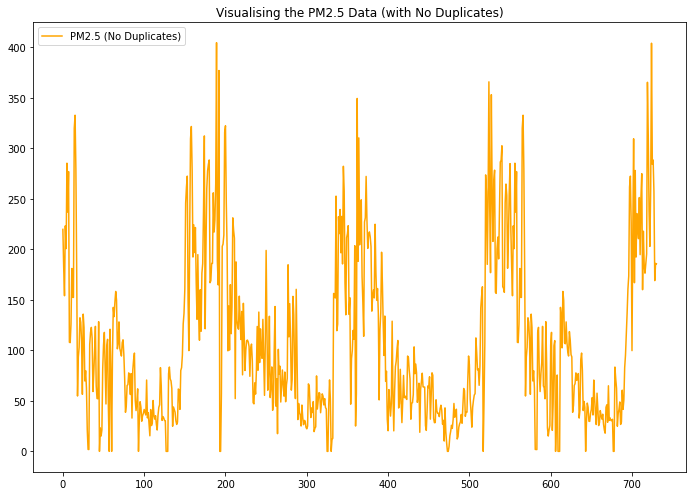

In [16]:
# Visualising the PM 2.5 Values

sns.lineplot(data = df["PM 2.5"], color="orange", label="PM2.5 (No Duplicates)")
plt.title('Visualising the PM2.5 Data (with No Duplicates)')
plt.show()

## EDA

- Fine particulate matter (PM2.5) is an air pollutant that is a concern for people's health when levels in air are high. PM2.5 are tiny particles in the air that reduce visibility and cause the air to appear hazy when levels are elevated.     
- Outdoor PM2.5 levels are most likely to be elevated on days with little or no wind or air mixing.

Creating a new binary feature `Acceptable`, its value will be **1** if the PM 2.5 lvl is acceptable and **0** if _not_.

In [18]:
pm_ = list(df['PM 2.5'])

Acceptable = []

for pm in pm_:
    if pm >= 151:
        Acceptable.append(0)
    else:
        Acceptable.append(1)

df['Acceptable'] = Acceptable

df.sample(3)

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5,Acceptable
484,30.9,35.8,28.6,1001.8,78.0,1.9,3.3,14.8,41.708333,1
106,30.0,35.5,26.2,997.5,83.0,1.9,3.7,11.1,26.583333,1
548,14.4,21.5,5.5,1021.0,60.0,1.8,8.9,18.3,210.875000,0


1    536
0    195
Name: Acceptable, dtype: int64


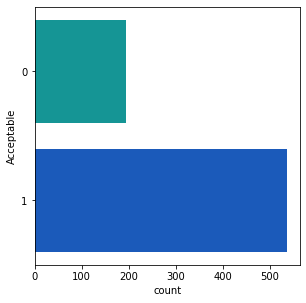

In [19]:
# figure size in inches
rcParams['figure.figsize'] = 4.75,4.75

print(df.Acceptable.value_counts())

sns.countplot(y = "Acceptable", data = df, palette = 'winter_r')
plt.show()

<mark>Out of the 731 days, **195** days had `unacceptable` PM 2.5 Levels</mark>

**Plot to see the relation between different climatical features and Acceptable PM2.5 levels**

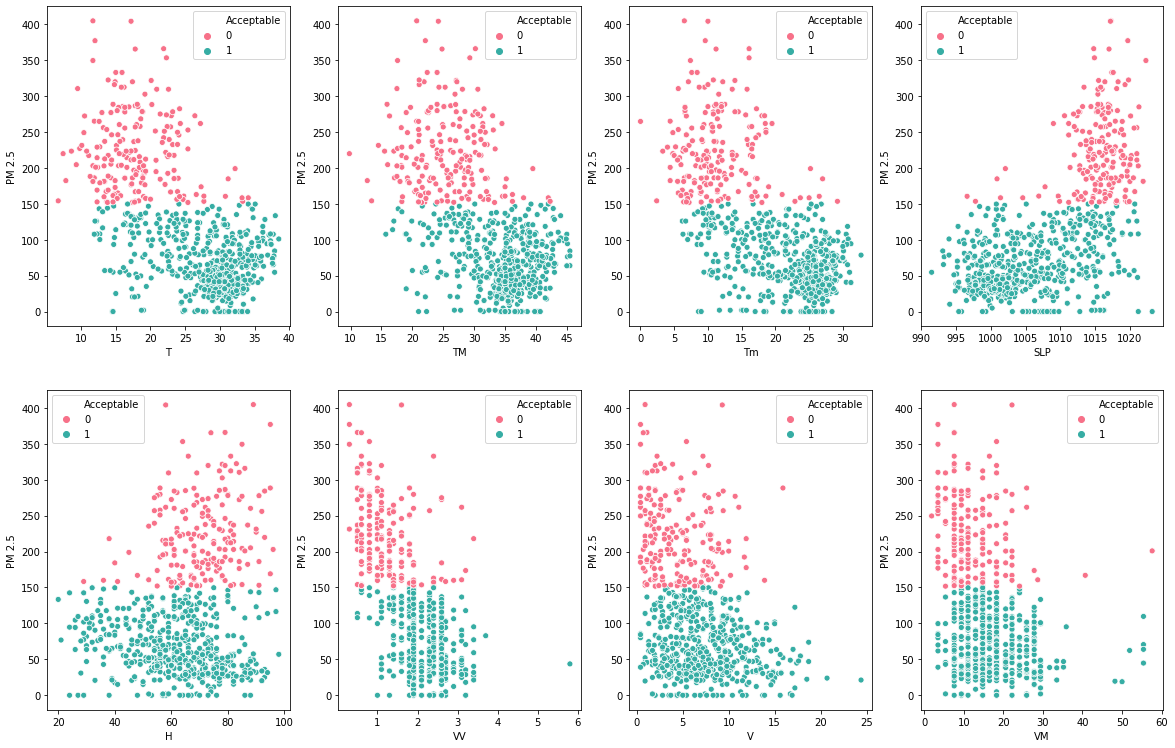

In [20]:
cols =  list(df.columns)

plt.figure(figsize=(20, 20))

for i in range(1, 9):
    plt.subplot(3, 4, i)
    sns.scatterplot(x = cols[i - 1], y = df['PM 2.5'],data = df, hue = "Acceptable", palette = "husl")

Except for `SLP`, not much was gained from this plot.  

- At higher SLP, the PM2.5 values tend to raise beyond the Acceptable level.

<mark>**Heatmap to see correlation between different features.**</mark>

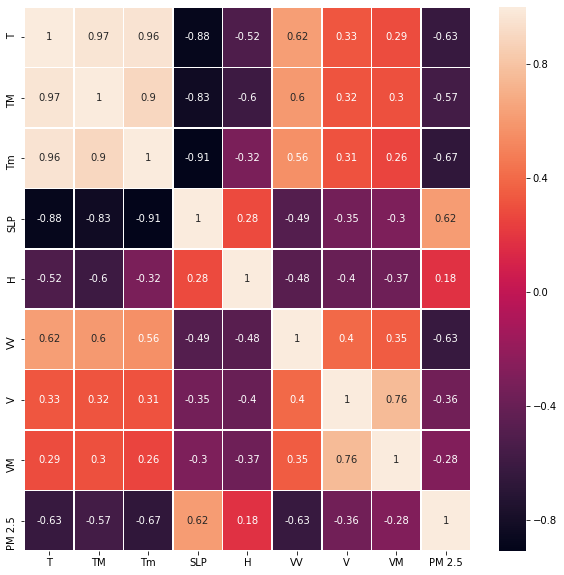

In [21]:
corrmat = df.corr()
top_corr_features = corrmat.index[:-1] # dropping 'Acceptable'

plt.figure(figsize=(10,10))

#plot heat map
sns.heatmap(df[top_corr_features].corr(),annot = True, linewidths=.5)
# print(corrmat)
plt.show()

Once again we can see that _SLP_ is highly correlated with PM 2.5

## Prepairing Data for Model Preparation

In [22]:
from sklearn.model_selection import train_test_split

X = df[['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM']]
y = df['PM 2.5']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.10, random_state = 42)

In [23]:
print('Length of X_train', len(X_train))
print('Length of X_val', len(X_val))
print('Length of y_train', len(y_train))
print('Length of y_val', len(y_val))

Length of X_train 657
Length of X_val 74
Length of y_train 657
Length of y_val 74


## Applying Machine Learning Algos :

##### I will be applying various Regression algos and then later deploy using the best model.

- Linear Regression

### Linear Regression

In [24]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

print("lr.score : ", lr.score(X_val, y_val))
print("lr.coef_ : ",lr.coef_)
print("lr.intercept_ : ",lr.intercept_)

lr.score :  0.4933766804600188
lr.coef_ :  [ 1.90077649e+00  3.92929463e-02 -6.37936282e+00  4.71165649e-01
 -9.67942560e-01 -5.27430742e+01 -2.49218585e+00  2.09558903e-02]
lr.intercept_ :  -115.14163346023665


In [25]:
print("lr.score of training data: ", lr.score(X_train, y_train))

lr.score of training data:  0.5903625219690201


There seems to be overfitting as there is a 10% accuracy difference in train and validation set

In [26]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(lr , X, y, cv = 5)

print(score)
print("Mean score : ",score.mean())

[0.51308156 0.48833908 0.64009098 0.5746025  0.11785428]
Mean score :  0.4667936792982825


#### Model Evaluation

In [27]:
coeff_df = pd.DataFrame(lr.coef_, X.columns, columns = ['Coefficient'])
coeff_df

,Coefficient
T,1.900776
TM,0.039293
Tm,-6.379363
SLP,0.471166
H,-0.967943
VV,-52.743074
V,-2.492186
VM,0.020956


Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in T is associated with an decrease of 1.900 in AQI PM 2.5 .
- Holding all other features fixed, a 1 unit increase in TM is associated with an increase of 0.039 in AQI PM 2.5 .
- Similarly for the rest

#### Evaluation Metrics

Three common evaluation metrics for regression problems:

- Mean Absolute Error (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

- Mean Squared Error (MSE) is the mean of the squared errors, MSE "punishes" larger errors, which tends to be useful in the real world:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

- Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors, RMSE is interpretable in the "y" units:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

In [32]:
from sklearn import metrics

prediction = lr.predict(X_val)

print('MAE:', metrics.mean_absolute_error(y_val, prediction))
print('MSE:', metrics.mean_squared_error(y_val, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_val, prediction)))

MAE: 37.29718684760131
MSE: 2512.6778183058623
RMSE: 50.12661786222827


#### Saving the Model as pickle file

In [33]:
import pickle

file = open('Models/linear_regression_model.pkl', 'wb')

# dump information to the file
pickle.dump(lr, file)